<a href="https://colab.research.google.com/github/AlejandroxConti/PES-UTN-FRA/blob/main/Copy_of_Tp0_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nota: este archivo no lo podrán editar. Ir a archivo/guardar una copia en drive

# Introducción a Señales

Objetivos:
1. Definir funciones para generar señal cuadrada y triangular en python 'puro' (sin librerías).
2. Generar, con *numpy* y *scipy.signal*, las señales: cuadrada, dirac, triangular, y senoidal.
3. Hacer lo mismo que en el punto anterior usando una base de tiempo. Graficar todas las señales.
4. Calcular máximos y mínimos con subindices en python puro.
5. Idem anterior con numpy.

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


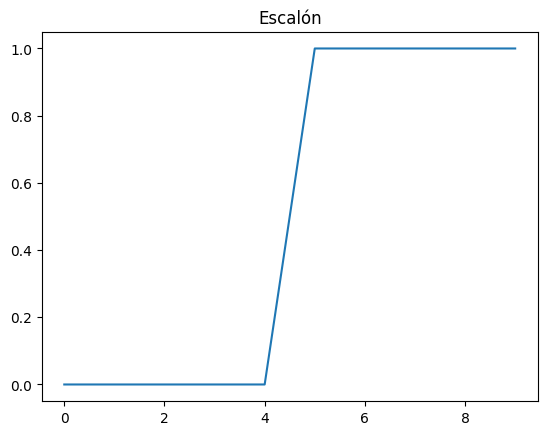

el largo del vector delta_dirac es: 100


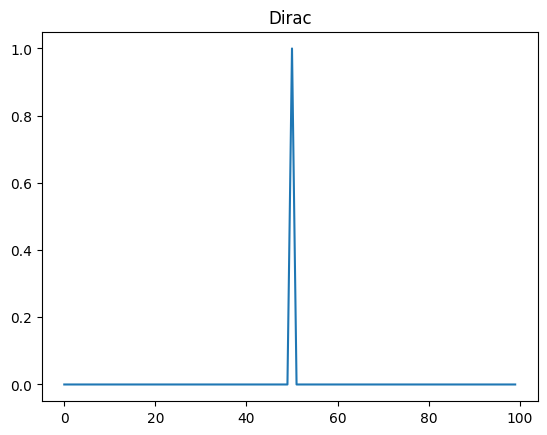

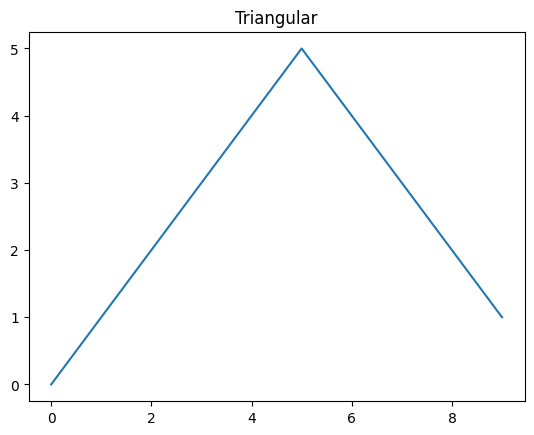

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Señal cuadrada (escalón) CONTI ALEJANDRO
senial_cuad = [] #inicializo un array vacío
for a in range(5):
    senial_cuad.append(0)
for a in range(5):
    senial_cuad.append(1)
print(senial_cuad)
plt.title("Escalón")
plt.plot(senial_cuad)
plt.show()

# Señal delta de dirac
delta_dirac = []
for a in range(100):
    delta_dirac.append(0)
dd= int(len(delta_dirac)/2) #obtener la posición del medio del array
delta_dirac[dd] = 1
print("el largo del vector delta_dirac es: {}".format(len(delta_dirac)))
plt.title("Dirac")
plt.plot(delta_dirac)
plt.show()

# Señal triangular
senial_tria = []
for a in range(5):
    senial_tria.append(a)
for a in range(5,0,-1):
    senial_tria.append(a)
plt.title("Triangular")
plt.plot(senial_tria)
plt.show()


#Se puede definir funciones y parametrizar las señales que voy a generar
#Ejemplo con delta de dirac
def generar_delta_dirac(cantidad,pos):
    delta_dirac = []
    for a in range(cantidad):
        delta_dirac.append(0)
    delta_dirac[pos] = 1
    return delta_dirac

print(generar_delta_dirac(10,5))

In [2]:
# 1. Definir funciones para generar señal cuadrada y triangular en python 'puro' (sin librerías).

def generar_senial_cuadrada(n_zeros, n_ones):
    senial_cuad = []

    # Añadir los ceros
    for _ in range(n_zeros):
        senial_cuad.append(0)

    # Añadir los unos
    for _ in range(n_ones):
        senial_cuad.append(1)

    return senial_cuad

def graficar_senal(senal, titulo):
    print(f"\n{titulo}")
    for valor in senal:
        # Representar 0 con '-' y 1 con '*'
        print('*' if valor == 1 else '-', end="")
    print("\n")

# Ejemplo de uso para la señal cuadrada
senial_cuadrada = generar_senial_cuadrada(5, 5)
graficar_senal(senial_cuadrada, "Señal Cuadrada (Escalón)")

def generar_senial_triangular(max_valor):
    senial_tria = []

    # Parte ascendente de la señal
    for i in range(max_valor):
        senial_tria.append(i)

    # Parte descendente de la señal
    for i in range(max_valor, 0, -1):
        senial_tria.append(i)

    return senial_tria

# Modificar la función de graficado para la señal triangular, mostrando su valor
def graficar_senal_numerica(senal, titulo):
    print(f"\n{titulo}")
    for valor in senal:
        print(f"{valor}", end=" ")
    print("\n")

# Ejemplo de uso para la señal triangular
senial_triangular = generar_senial_triangular(5)
graficar_senal_numerica(senial_triangular, "Señal Triangular")



Señal Cuadrada (Escalón)
-----*****


Señal Triangular
0 1 2 3 4 5 4 3 2 1 



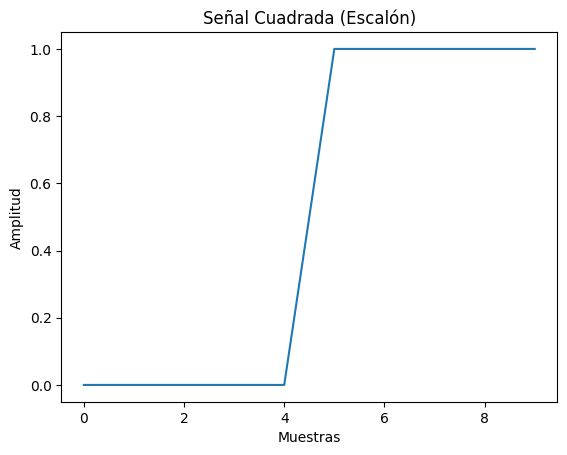

<ipython-input-7-aca8c9065dea>:39: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(delta_dirac, use_line_collection=True)  # Graficar usando 'stem' para un impulso


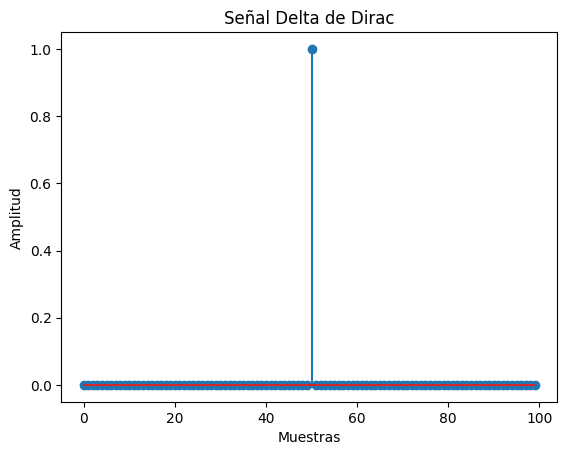

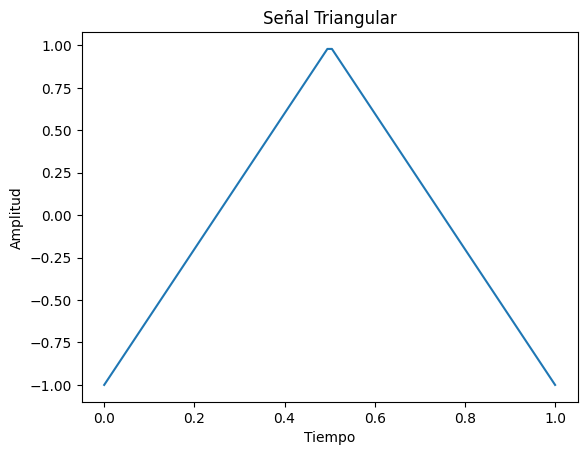

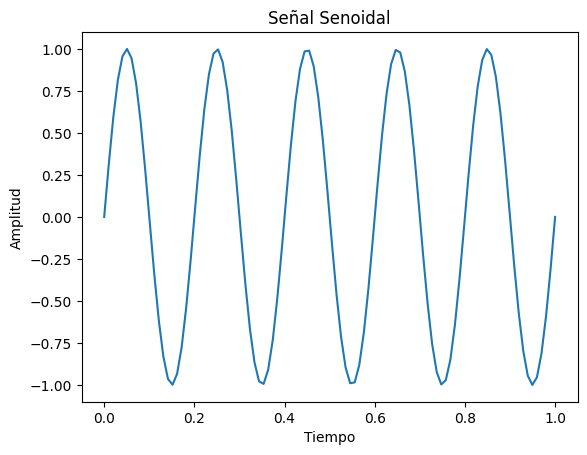

In [7]:
# 2. Generar, con *numpy* y/o *scipy.signal*, las señales: cuadrada, dirac, triangular, y senoidal.

# Pista: Esto es como lo que hicimos en el punto anterior, pero usando el método
# np.append en lugar del .append propio de Python.

# Señal Cuadrada con numpy

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def generar_senial_cuadrada(n_zeros, n_ones):
    senial_cuad = np.zeros(n_zeros)  # Crear array de ceros
    senial_cuad = np.append(senial_cuad, np.ones(n_ones))  # Agregar unos
    return senial_cuad

# Generar y graficar señal cuadrada
senial_cuadrada = generar_senial_cuadrada(5, 5)
plt.figure()
plt.title("Señal Cuadrada (Escalón)")
plt.plot(senial_cuadrada)
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
# plt.grid(True)
plt.show()


# Señal delta de dirac con numpy

def generar_delta_dirac(longitud, posicion_impulso):
    delta_dirac = np.zeros(longitud)  # Crear array de ceros
    delta_dirac[posicion_impulso] = 1  # Colocar el impulso en la posición especificada
    return delta_dirac

# Generar y graficar señal delta de Dirac
delta_dirac = generar_delta_dirac(100, 50)  # Longitud 100, impulso en el medio
plt.figure()
plt.title("Señal Delta de Dirac")
plt.stem(delta_dirac, use_line_collection=True)  # Graficar usando 'stem' para un impulso
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
# plt.grid(True)
plt.show()


# Señal triangular con numpy

def generar_senial_triangular(periodos, num_muestras):
    t = np.linspace(0, 1, num_muestras)
    senial_tria = signal.sawtooth(2 * np.pi * periodos * t, 0.5)  # Triangular
    return t, senial_tria

# Generar y graficar señal triangular
t, senial_triangular = generar_senial_triangular(1, 100)
plt.figure()
plt.title("Señal Triangular")
plt.plot(t, senial_triangular)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
# plt.grid(True)
plt.show()


# Señal senoidal con numpy

def generar_senial_senoidal(frecuencia, num_muestras, amplitud=1):
    t = np.linspace(0, 1, num_muestras)
    senial_senoidal = amplitud * np.sin(2 * np.pi * frecuencia * t)
    return t, senial_senoidal

# Generar y graficar señal senoidal
t, senial_senoidal = generar_senial_senoidal(5, 100)  # Frecuencia de 5 Hz, 100 muestras
plt.figure()
plt.title("Señal Senoidal")
plt.plot(t, senial_senoidal)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
# plt.grid(True)
plt.show()


t: [0.000e+00 2.000e-04 4.000e-04 ... 9.994e-01 9.996e-01 9.998e-01]
Señal cuadrada scipy: [ 1.  1.  1. ... -1. -1. -1.]


(-2.0, 2.0)

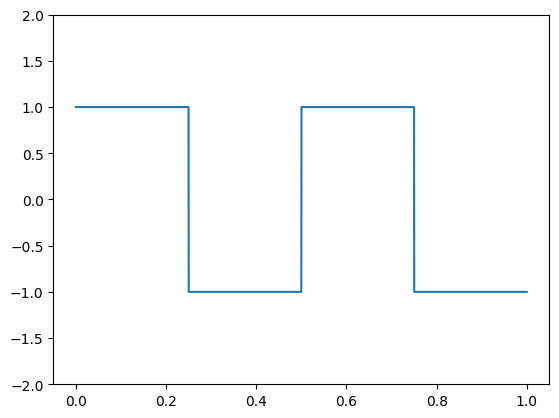

In [ ]:
# Ejemplo:  Señal cuadrada con scipy
import scipy.signal as sig
import matplotlib.pyplot as plt

#Parámetros de la señal
frec_muestreo = 5000 #en Hz
frec_senial = 2 # en Hz
# Base de tiempo de 2 formas (es indistinto cuál usar)
# t = np.linspace(0, 1, frec_muestreo, endpoint=False)
t = np.arange(0,1,1/frec_muestreo)

print("t: {}".format(t))
senial_cuadrada_scipy = sig.square(2 * np.pi * frec_senial * t)
print("Señal cuadrada scipy: {}".format(senial_cuadrada_scipy))

plt.plot(t, senial_cuadrada_scipy)
plt.ylim(-2, 2)


<ipython-input-4-b6d2ff2973e6>:67: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t, senial_delta_dirac, use_line_collection=True)


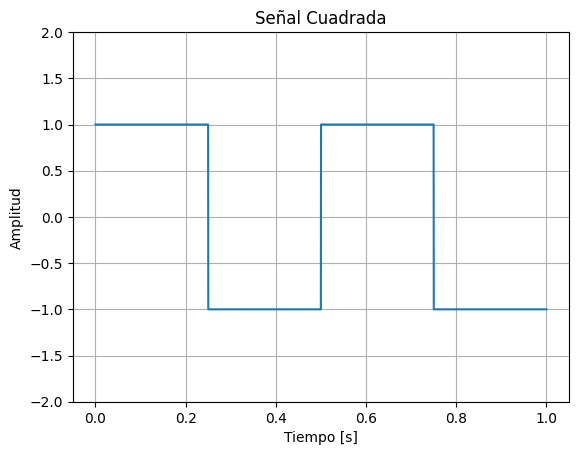

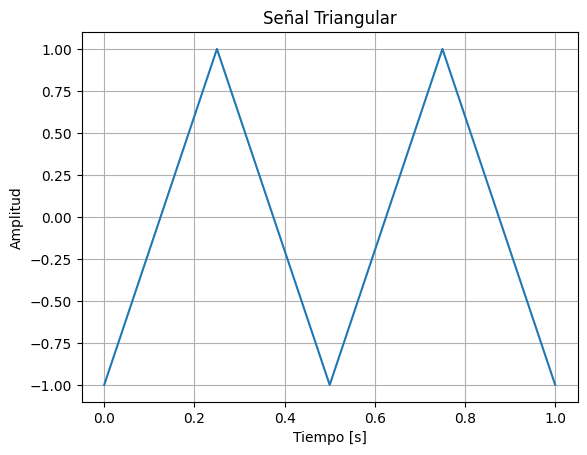

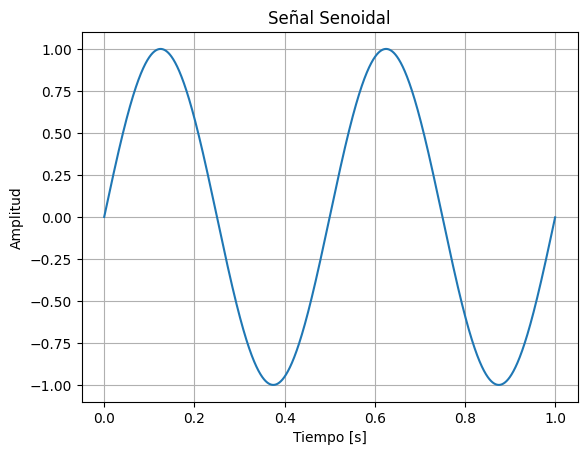

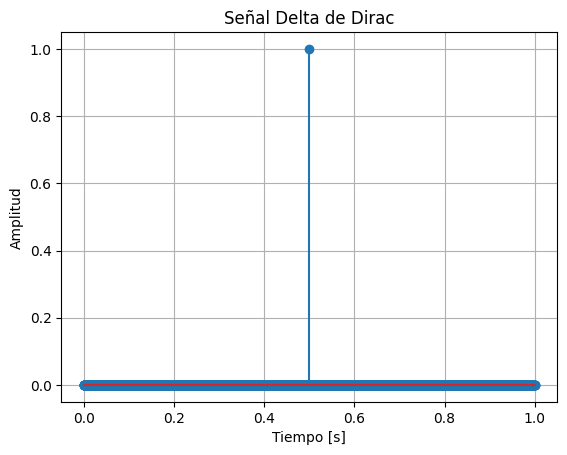

In [4]:
# 3. Hacer lo mismo que en el punto anterior usando una base de tiempo. Graficar todas las señales.

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Parámetros comunes
frec_muestreo = 5000  # Frecuencia de muestreo en Hz
frec_senial = 2  # Frecuencia de la señal en Hz
duracion = 1  # Duración de la señal en segundos

# Base de tiempo
t = np.linspace(0, duracion, frec_muestreo * duracion, endpoint=False)  # Vector de tiempo

# Senal Cuadrada con numpy/scipy?

# Señal cuadrada
senial_cuadrada = sig.square(2 * np.pi * frec_senial * t)

# Graficar la señal cuadrada
plt.figure()
plt.plot(t, senial_cuadrada)
plt.title("Señal Cuadrada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.ylim(-2, 2)
plt.grid(True)


# Señal triangular con numpy/scipy? (pista: sig.sawtooth)

# Señal triangular
senial_triangular = sig.sawtooth(2 * np.pi * frec_senial * t, 0.5)

# Graficar la señal triangular
plt.figure()
plt.plot(t, senial_triangular)
plt.title("Señal Triangular")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)


# Señal senoidal con numpy/scipy? (pista: np.sin)

# Señal senoidal
senial_senoidal = np.sin(2 * np.pi * frec_senial * t)

# Graficar la señal senoidal
plt.figure()
plt.plot(t, senial_senoidal)
plt.title("Señal Senoidal")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)


# Delta de dirac con numpy/scipy? (pista: sig.unit_impulse)

# Señal Delta de Dirac
longitud = frec_muestreo * duracion
posicion_impulso = int(longitud / 2)  # Impulso en la mitad
senial_delta_dirac = sig.unit_impulse(longitud, posicion_impulso)

# Graficar la señal delta de Dirac
plt.figure()
plt.stem(t, senial_delta_dirac, use_line_collection=True)
plt.title("Señal Delta de Dirac")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)

plt.show()



In [5]:
# Sintaxis para el manejo de arrays:

print(t[-1:]) #obtengo el último valor del array
print(t[0]) #obtengo el primer valor del array
print(t[:]) #obtengo todo el array
print(t[5:7]) #obtengo desde el elemento 5 (inclusive) hasta el 7 (exclusive)
print(t[-5:]) #obtengo los últimos 5 elementos del array
print(t[:3]) #obtengo los primeros 3 elementos del array
print(t[::2]) #elementos en posiciones pares

[0.9998]
0.0
[0.000e+00 2.000e-04 4.000e-04 ... 9.994e-01 9.996e-01 9.998e-01]
[0.001  0.0012]
[0.999  0.9992 0.9994 0.9996 0.9998]
[0.     0.0002 0.0004]
[0.000e+00 4.000e-04 8.000e-04 ... 9.988e-01 9.992e-01 9.996e-01]


In [10]:
# 4. Calcular máximos y mínimos con subindices en python puro.

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Parámetros comunes
frec_muestreo = 5000  # Frecuencia de muestreo en Hz
frec_senial = 2  # Frecuencia de la señal en Hz
duracion = 1  # Duración de la señal en segundos

# Base de tiempo
t = np.linspace(0, duracion, frec_muestreo * duracion, endpoint=False)

# Señal cuadrada
senial_cuadrada = sig.square(2 * np.pi * frec_senial * t)

# Calcular el máximo y el mínimo de la señal cuadrada
max_valor_cuadrada = max(senial_cuadrada)
min_valor_cuadrada = min(senial_cuadrada)
max_indice_cuadrada = list(senial_cuadrada).index(max_valor_cuadrada)
min_indice_cuadrada = list(senial_cuadrada).index(min_valor_cuadrada)

print("Señal Cuadrada:")
print(f"Máximo valor: {max_valor_cuadrada}, en el índice: {max_indice_cuadrada}")
print(f"Mínimo valor: {min_valor_cuadrada}, en el índice: {min_indice_cuadrada}")


# Señal triangular
senial_triangular = sig.sawtooth(2 * np.pi * frec_senial * t, 0.5)

# Calcular el máximo y el mínimo de la señal triangular
max_valor_triangular = max(senial_triangular)
min_valor_triangular = min(senial_triangular)
max_indice_triangular = list(senial_triangular).index(max_valor_triangular)
min_indice_triangular = list(senial_triangular).index(min_valor_triangular)

print("\nSeñal Triangular:")
print(f"Máximo valor: {max_valor_triangular}, en el índice: {max_indice_triangular}")
print(f"Mínimo valor: {min_valor_triangular}, en el índice: {min_indice_triangular}")


# Señal senoidal
senial_senoidal = np.sin(2 * np.pi * frec_senial * t)

# Calcular el máximo y el mínimo de la señal senoidal
max_valor_senoidal = max(senial_senoidal)
min_valor_senoidal = min(senial_senoidal)
max_indice_senoidal = list(senial_senoidal).index(max_valor_senoidal)
min_indice_senoidal = list(senial_senoidal).index(min_valor_senoidal)

print("\nSeñal Senoidal:")
print(f"Máximo valor: {max_valor_senoidal}, en el índice: {max_indice_senoidal}")
print(f"Mínimo valor: {min_valor_senoidal}, en el índice: {min_indice_senoidal}")

# Señal Delta de Dirac
longitud = frec_muestreo * duracion
posicion_impulso = int(longitud / 2)  # Impulso en la mitad
senial_delta_dirac = sig.unit_impulse(longitud, posicion_impulso)

# Calcular el máximo y el mínimo de la señal delta de Dirac
max_valor_dirac = max(senial_delta_dirac)
min_valor_dirac = min(senial_delta_dirac)
max_indice_dirac = list(senial_delta_dirac).index(max_valor_dirac)
min_indice_dirac = list(senial_delta_dirac).index(min_valor_dirac)

print("\nSeñal Delta de Dirac:")
print(f"Máximo valor: {max_valor_dirac}, en el índice: {max_indice_dirac}")
print(f"Mínimo valor: {min_valor_dirac}, en el índice: {min_indice_dirac}")


# 5. Idem anterior con numpy.

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Parámetros comunes
frec_muestreo = 5000  # Frecuencia de muestreo en Hz
frec_senial = 2  # Frecuencia de la señal en Hz
duracion = 1  # Duración de la señal en segundos

# Base de tiempo
t = np.linspace(0, duracion, frec_muestreo * duracion, endpoint=False)

# Señal cuadrada
senial_cuadrada = sig.square(2 * np.pi * frec_senial * t)

# Calcular el máximo y el mínimo de la señal cuadrada
max_valor_cuadrada = np.max(senial_cuadrada)
min_valor_cuadrada = np.min(senial_cuadrada)
max_indice_cuadrada = np.argmax(senial_cuadrada)
min_indice_cuadrada = np.argmin(senial_cuadrada)

print("Señal Cuadrada:")
print(f"Máximo valor: {max_valor_cuadrada}, en el índice: {max_indice_cuadrada}")
print(f"Mínimo valor: {min_valor_cuadrada}, en el índice: {min_indice_cuadrada}")

# Señal triangular
senial_triangular = sig.sawtooth(2 * np.pi * frec_senial * t, 0.5)

# Calcular el máximo y el mínimo de la señal triangular
max_valor_triangular = np.max(senial_triangular)
min_valor_triangular = np.min(senial_triangular)
max_indice_triangular = np.argmax(senial_triangular)
min_indice_triangular = np.argmin(senial_triangular)

print("\nSeñal Triangular:")
print(f"Máximo valor: {max_valor_triangular}, en el índice: {max_indice_triangular}")
print(f"Mínimo valor: {min_valor_triangular}, en el índice: {min_indice_triangular}")

# Señal senoidal
senial_senoidal = np.sin(2 * np.pi * frec_senial * t)

# Calcular el máximo y el mínimo de la señal senoidal
max_valor_senoidal = np.max(senial_senoidal)
min_valor_senoidal = np.min(senial_senoidal)
max_indice_senoidal = np.argmax(senial_senoidal)
min_indice_senoidal = np.argmin(senial_senoidal)

print("\nSeñal Senoidal:")
print(f"Máximo valor: {max_valor_senoidal}, en el índice: {max_indice_senoidal}")
print(f"Mínimo valor: {min_valor_senoidal}, en el índice: {min_indice_senoidal}")

# Señal Delta de Dirac
longitud = frec_muestreo * duracion
posicion_impulso = int(longitud / 2)  # Impulso en la mitad
senial_delta_dirac = sig.unit_impulse(longitud, posicion_impulso)

# Calcular el máximo y el mínimo de la señal delta de Dirac
max_valor_dirac = np.max(senial_delta_dirac)
min_valor_dirac = np.min(senial_delta_dirac)
max_indice_dirac = np.argmax(senial_delta_dirac)
min_indice_dirac = np.argmin(senial_delta_dirac)

print("\nSeñal Delta de Dirac:")
print(f"Máximo valor: {max_valor_dirac}, en el índice: {max_indice_dirac}")
print(f"Mínimo valor: {min_valor_dirac}, en el índice: {min_indice_dirac}")

plt.show()


Señal Cuadrada:
Máximo valor: 1.0, en el índice: 0
Mínimo valor: -1.0, en el índice: 1250

Señal Triangular:
Máximo valor: 1.0, en el índice: 1250
Mínimo valor: -1.0, en el índice: 0

Señal Senoidal:
Máximo valor: 1.0, en el índice: 625
Mínimo valor: -1.0, en el índice: 1875

Señal Delta de Dirac:
Máximo valor: 1.0, en el índice: 2500
Mínimo valor: 0.0, en el índice: 0
Señal Cuadrada:
Máximo valor: 1.0, en el índice: 0
Mínimo valor: -1.0, en el índice: 1250

Señal Triangular:
Máximo valor: 1.0, en el índice: 1250
Mínimo valor: -1.0, en el índice: 0

Señal Senoidal:
Máximo valor: 1.0, en el índice: 625
Mínimo valor: -1.0, en el índice: 1875

Señal Delta de Dirac:
Máximo valor: 1.0, en el índice: 2500
Mínimo valor: 0.0, en el índice: 0
